In [264]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as mpl
import matplotlib.pyplot as plt
import warnings
from matplotlib.ticker import FuncFormatter
import folium
from folium import plugins
import contextily as ctx
from urllib.request import urlopen


from io import StringIO
import statsmodels.api as sm

In [265]:
warnings.filterwarnings("ignore")

url = 'https://raw.githubusercontent.com/Luovelar/Coder_TP/main/Acidentes_Brasil_2020-2022.csv'

with urlopen(url) as response:
    data = response.read().decode('ISO-8859-1').splitlines()

data = '\n'.join(data)
df = pd.read_csv(StringIO(data), delimiter=';')

(df.head(5))

,Id_acidente,Año_acidente,Dia_semana,Horario,Unidad_federal,Br,Km,Municipio,Causa_acidente,Tipo_acidente,...,Feridos_graves,Ilesos,Ignorados,Feridos,Veiculos,Latitude,Longitude,Regional,Delegacia,"uop,,,,,,,"
0,260068.0,1/1/2020,quarta-feira,05:40:00,PA,316.0,84,SAO FRANCISCO DO PARA,Falta de Atenção à Condução,Saída de leito carroçável,...,0,0,0,2,1,-1.310193,-47.744564,SPRF-PA,DEL01-PA,"UOP02-DEL01-PA,,,,,,,"
1,260073.0,1/1/2020,quarta-feira,06:00:00,MG,262.0,804,UBERABA,Falta de Atenção à Condução,Colisão transversal,...,0,3,0,1,2,-19.767475,-47.987255,SPRF-MG,DEL13-MG,"UOP01-DEL13-MG,,,,,,,"
2,260087.0,1/1/2020,quarta-feira,06:00:00,BA,116.0,191,CANUDOS,Condutor Dormindo,Saída de leito carroçável,...,0,0,0,0,1,-10.320021,-39.064252,SPRF-BA,DEL07-BA,"UOP02-DEL07-BA,,,,,,,"
3,260116.0,1/1/2020,quarta-feira,10:08:00,SP,116.0,71,APARECIDA,Não guardar distância de segurança,Colisão traseira,...,0,1,0,2,2,-22.856517,-45.231143,SPRF-SP,DEL08-SP,"UOP01-DEL08-SP,,,,,,,"
4,260129.0,1/1/2020,quarta-feira,12:10:00,MG,262.0,"380,9",JUATUBA,Condutor Dormindo,Saída de leito carroçável,...,0,0,0,1,1,-19.947864,-44.381226,SPRF-MG,DEL01-MG,"UOP03-DEL01-MG,,,,,,"


In [266]:
df['Año_acidente'] = pd.to_datetime(df['Año_acidente'], format='%d/%m/%Y', errors='coerce')

df = df.dropna(subset=['Año_acidente'])

df['Año'] = df['Año_acidente'].dt.year

# Manejo de valores faltantes
df.dropna(inplace=True)

# Conversión de tipos de datos
df['Año_acidente'] = pd.to_datetime(df['Año_acidente'])

# Exploración valores vacíos

In [267]:
valores_nulos  = df.isnull().sum()
columnas_con_nulos = valores_nulos[valores_nulos == 0]
columnas_con_nulos

Id_acidente               0
Año_acidente              0
Dia_semana                0
Horario                   0
Unidad_federal            0
Br                        0
Km                        0
Municipio                 0
Causa_acidente            0
Tipo_acidente             0
Classificacao_acidente    0
Fase_dia                  0
Sentido_via               0
Condicao_metereologica    0
Tipo_pista                0
Tracado_via               0
Uso_solo                  0
Pessoas                   0
Mortos                    0
Feridos_leves             0
Feridos_graves            0
Ilesos                    0
Ignorados                 0
Feridos                   0
Veiculos                  0
Latitude                  0
Longitude                 0
Regional                  0
Delegacia                 0
uop,,,,,,,                0
Año                       0
dtype: int64

In [268]:
(df.head(5))

,Id_acidente,Año_acidente,Dia_semana,Horario,Unidad_federal,Br,Km,Municipio,Causa_acidente,Tipo_acidente,...,Ilesos,Ignorados,Feridos,Veiculos,Latitude,Longitude,Regional,Delegacia,"uop,,,,,,,",Año
0,260068.0,2020-01-01,quarta-feira,05:40:00,PA,316.0,84,SAO FRANCISCO DO PARA,Falta de Atenção à Condução,Saída de leito carroçável,...,0,0,2,1,-1.310193,-47.744564,SPRF-PA,DEL01-PA,"UOP02-DEL01-PA,,,,,,,",2020
1,260073.0,2020-01-01,quarta-feira,06:00:00,MG,262.0,804,UBERABA,Falta de Atenção à Condução,Colisão transversal,...,3,0,1,2,-19.767475,-47.987255,SPRF-MG,DEL13-MG,"UOP01-DEL13-MG,,,,,,,",2020
2,260087.0,2020-01-01,quarta-feira,06:00:00,BA,116.0,191,CANUDOS,Condutor Dormindo,Saída de leito carroçável,...,0,0,0,1,-10.320021,-39.064252,SPRF-BA,DEL07-BA,"UOP02-DEL07-BA,,,,,,,",2020
3,260116.0,2020-01-01,quarta-feira,10:08:00,SP,116.0,71,APARECIDA,Não guardar distância de segurança,Colisão traseira,...,1,0,2,2,-22.856517,-45.231143,SPRF-SP,DEL08-SP,"UOP01-DEL08-SP,,,,,,,",2020
4,260129.0,2020-01-01,quarta-feira,12:10:00,MG,262.0,"380,9",JUATUBA,Condutor Dormindo,Saída de leito carroçável,...,0,0,1,1,-19.947864,-44.381226,SPRF-MG,DEL01-MG,"UOP03-DEL01-MG,,,,,,",2020


In [269]:
df = df[['Año_acidente', 'Dia_semana', 'Horario', 'Unidad_federal', 'Br', 'Km', 'Municipio', 'Causa_acidente', 'Tipo_acidente', 'Sentido_via', 'Condicao_metereologica', 'Tipo_pista', 'Tracado_via', 'Pessoas', 'Mortos', 'Feridos_leves', 'Feridos_graves', 'Ilesos', 'Ignorados', 'Veiculos']].copy()

## Remoción de duplicados

In [270]:
df.duplicated().any()

True

In [271]:
df.drop_duplicates(inplace=True)
df.duplicated().any()

False

In [272]:
df['Dia_semana'] = df['Dia_semana'].str.title()
df['Municipio'] = df['Municipio'].str.title()

## Eliminación de registros con valor nulo

In [273]:
df.isnull().any().sum()

0

In [274]:
df.dropna(inplace=True)
df.isnull().any().any()

False

In [275]:
# Convertendo km para número real e BR para número inteiro.
df['km'] = df['Km'].map(lambda x: x.replace(',', '.')).astype(float)
df['Br'] = df['Br'].astype(int)

## Excluir los Outliers

In [276]:
df.describe()

,Año_acidente,Br,Pessoas,Mortos,Feridos_leves,Feridos_graves,Ilesos,Ignorados,Veiculos,km
count,191338,191338.000000,191338.000000,191338.000000,191338.000000,191338.000000,191338.000000,191338.000000,191338.000000,191338.000000
mean,2021-07-06 18:11:12.142491648,211.711453,2.354493,0.083747,0.849194,0.274812,0.986208,0.160533,1.647164,259.599213
min,2020-01-01 00:00:00,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2020-10-12 00:00:00,101.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,78.800000
50%,2021-07-08 00:00:00,158.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,192.800000
75%,2022-04-06 00:00:00,324.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,406.700000
max,2022-12-31 00:00:00,495.000000,75.000000,19.000000,50.000000,31.000000,73.000000,54.000000,23.000000,1454.500000
std,NaN,130.916179,1.890825,0.338424,1.038329,0.609714,1.479499,0.471636,0.723807,226.246341


 ### Función para eliminar valores atípicos a más de 5 desviaciones estándar de la media.

In [277]:
def outliers(df, colunas): 

    indices_incomuns = []
    todos_indices = np.zeros(len(df), dtype=bool)

    for coluna in colunas:

        df_coluna = np.array(df[coluna])
        
        desvio = df_coluna.std()
        media = df_coluna.mean()

        indice_incomum = df_coluna > (media + 5 * desvio)

        indices_incomuns.append(indice_incomum)

    for i in range(len(indices_incomuns)):

        todos_indices = np.logical_or(todos_indices, indices_incomuns[i])

    return todos_indices

In [278]:
# Removendo os outliers das colunas Pessoas e Veículos.
indices_outliers = outliers(df, ['Pessoas', 'Veiculos'])
df_sin_anio = df[~indices_outliers]

In [279]:
df.describe()

,Año_acidente,Br,Pessoas,Mortos,Feridos_leves,Feridos_graves,Ilesos,Ignorados,Veiculos,km
count,191338,191338.000000,191338.000000,191338.000000,191338.000000,191338.000000,191338.000000,191338.000000,191338.000000,191338.000000
mean,2021-07-06 18:11:12.142491648,211.711453,2.354493,0.083747,0.849194,0.274812,0.986208,0.160533,1.647164,259.599213
min,2020-01-01 00:00:00,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2020-10-12 00:00:00,101.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,78.800000
50%,2021-07-08 00:00:00,158.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,192.800000
75%,2022-04-06 00:00:00,324.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,406.700000
max,2022-12-31 00:00:00,495.000000,75.000000,19.000000,50.000000,31.000000,73.000000,54.000000,23.000000,1454.500000
std,NaN,130.916179,1.890825,0.338424,1.038329,0.609714,1.479499,0.471636,0.723807,226.246341


## Correlaciones

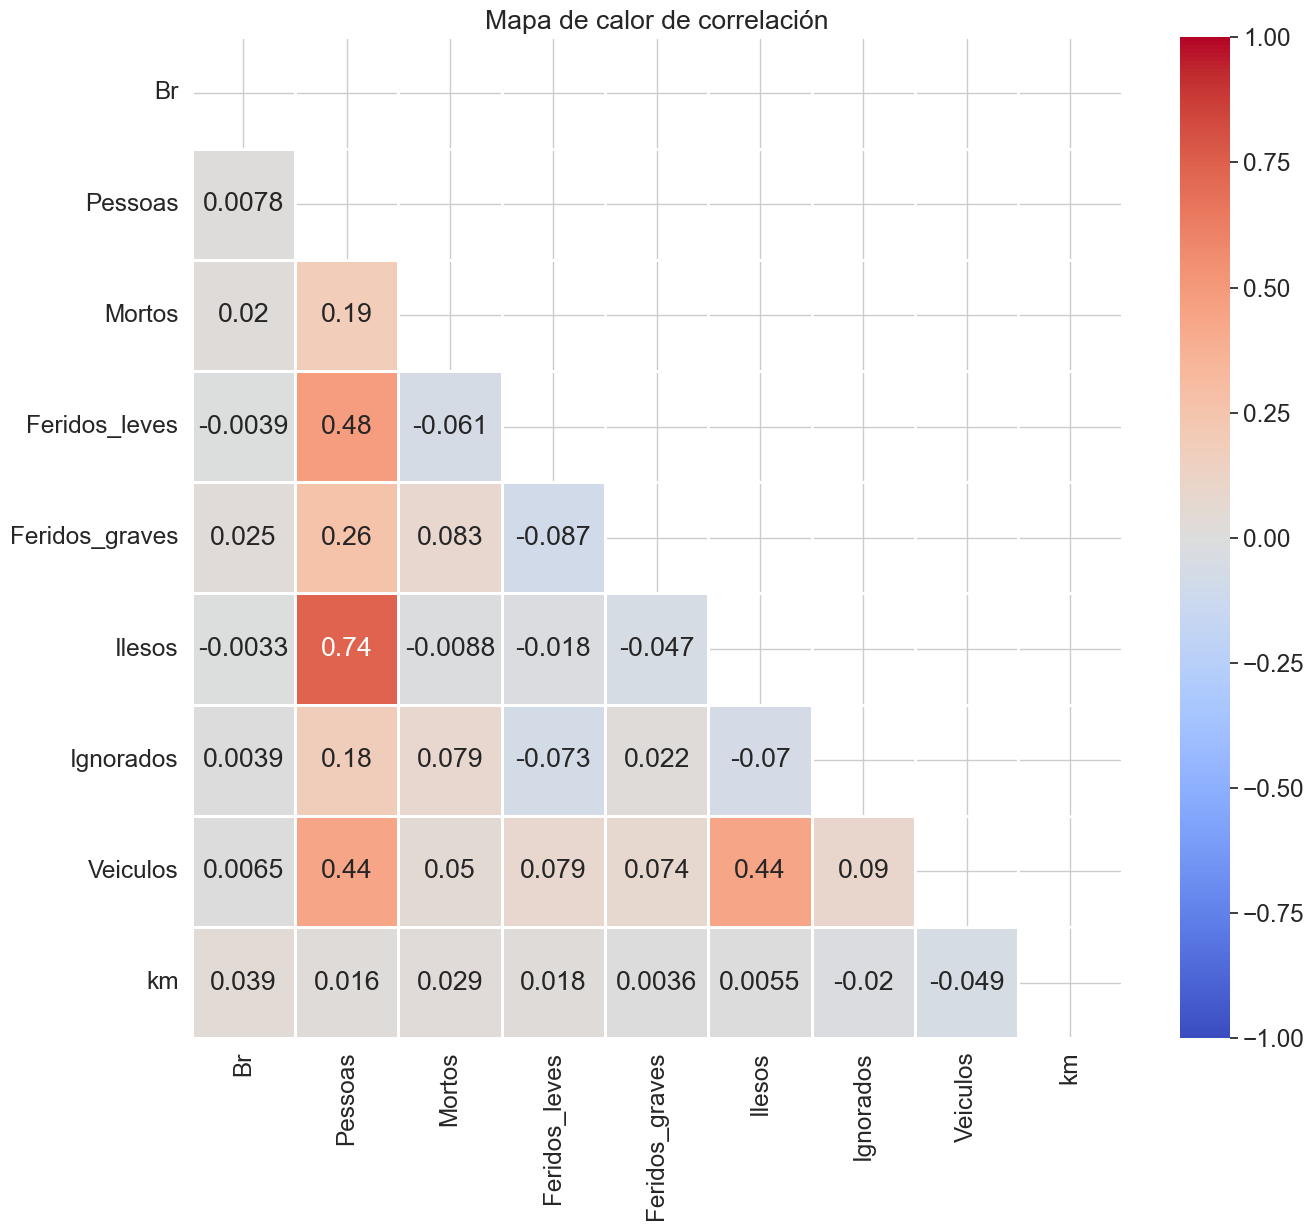

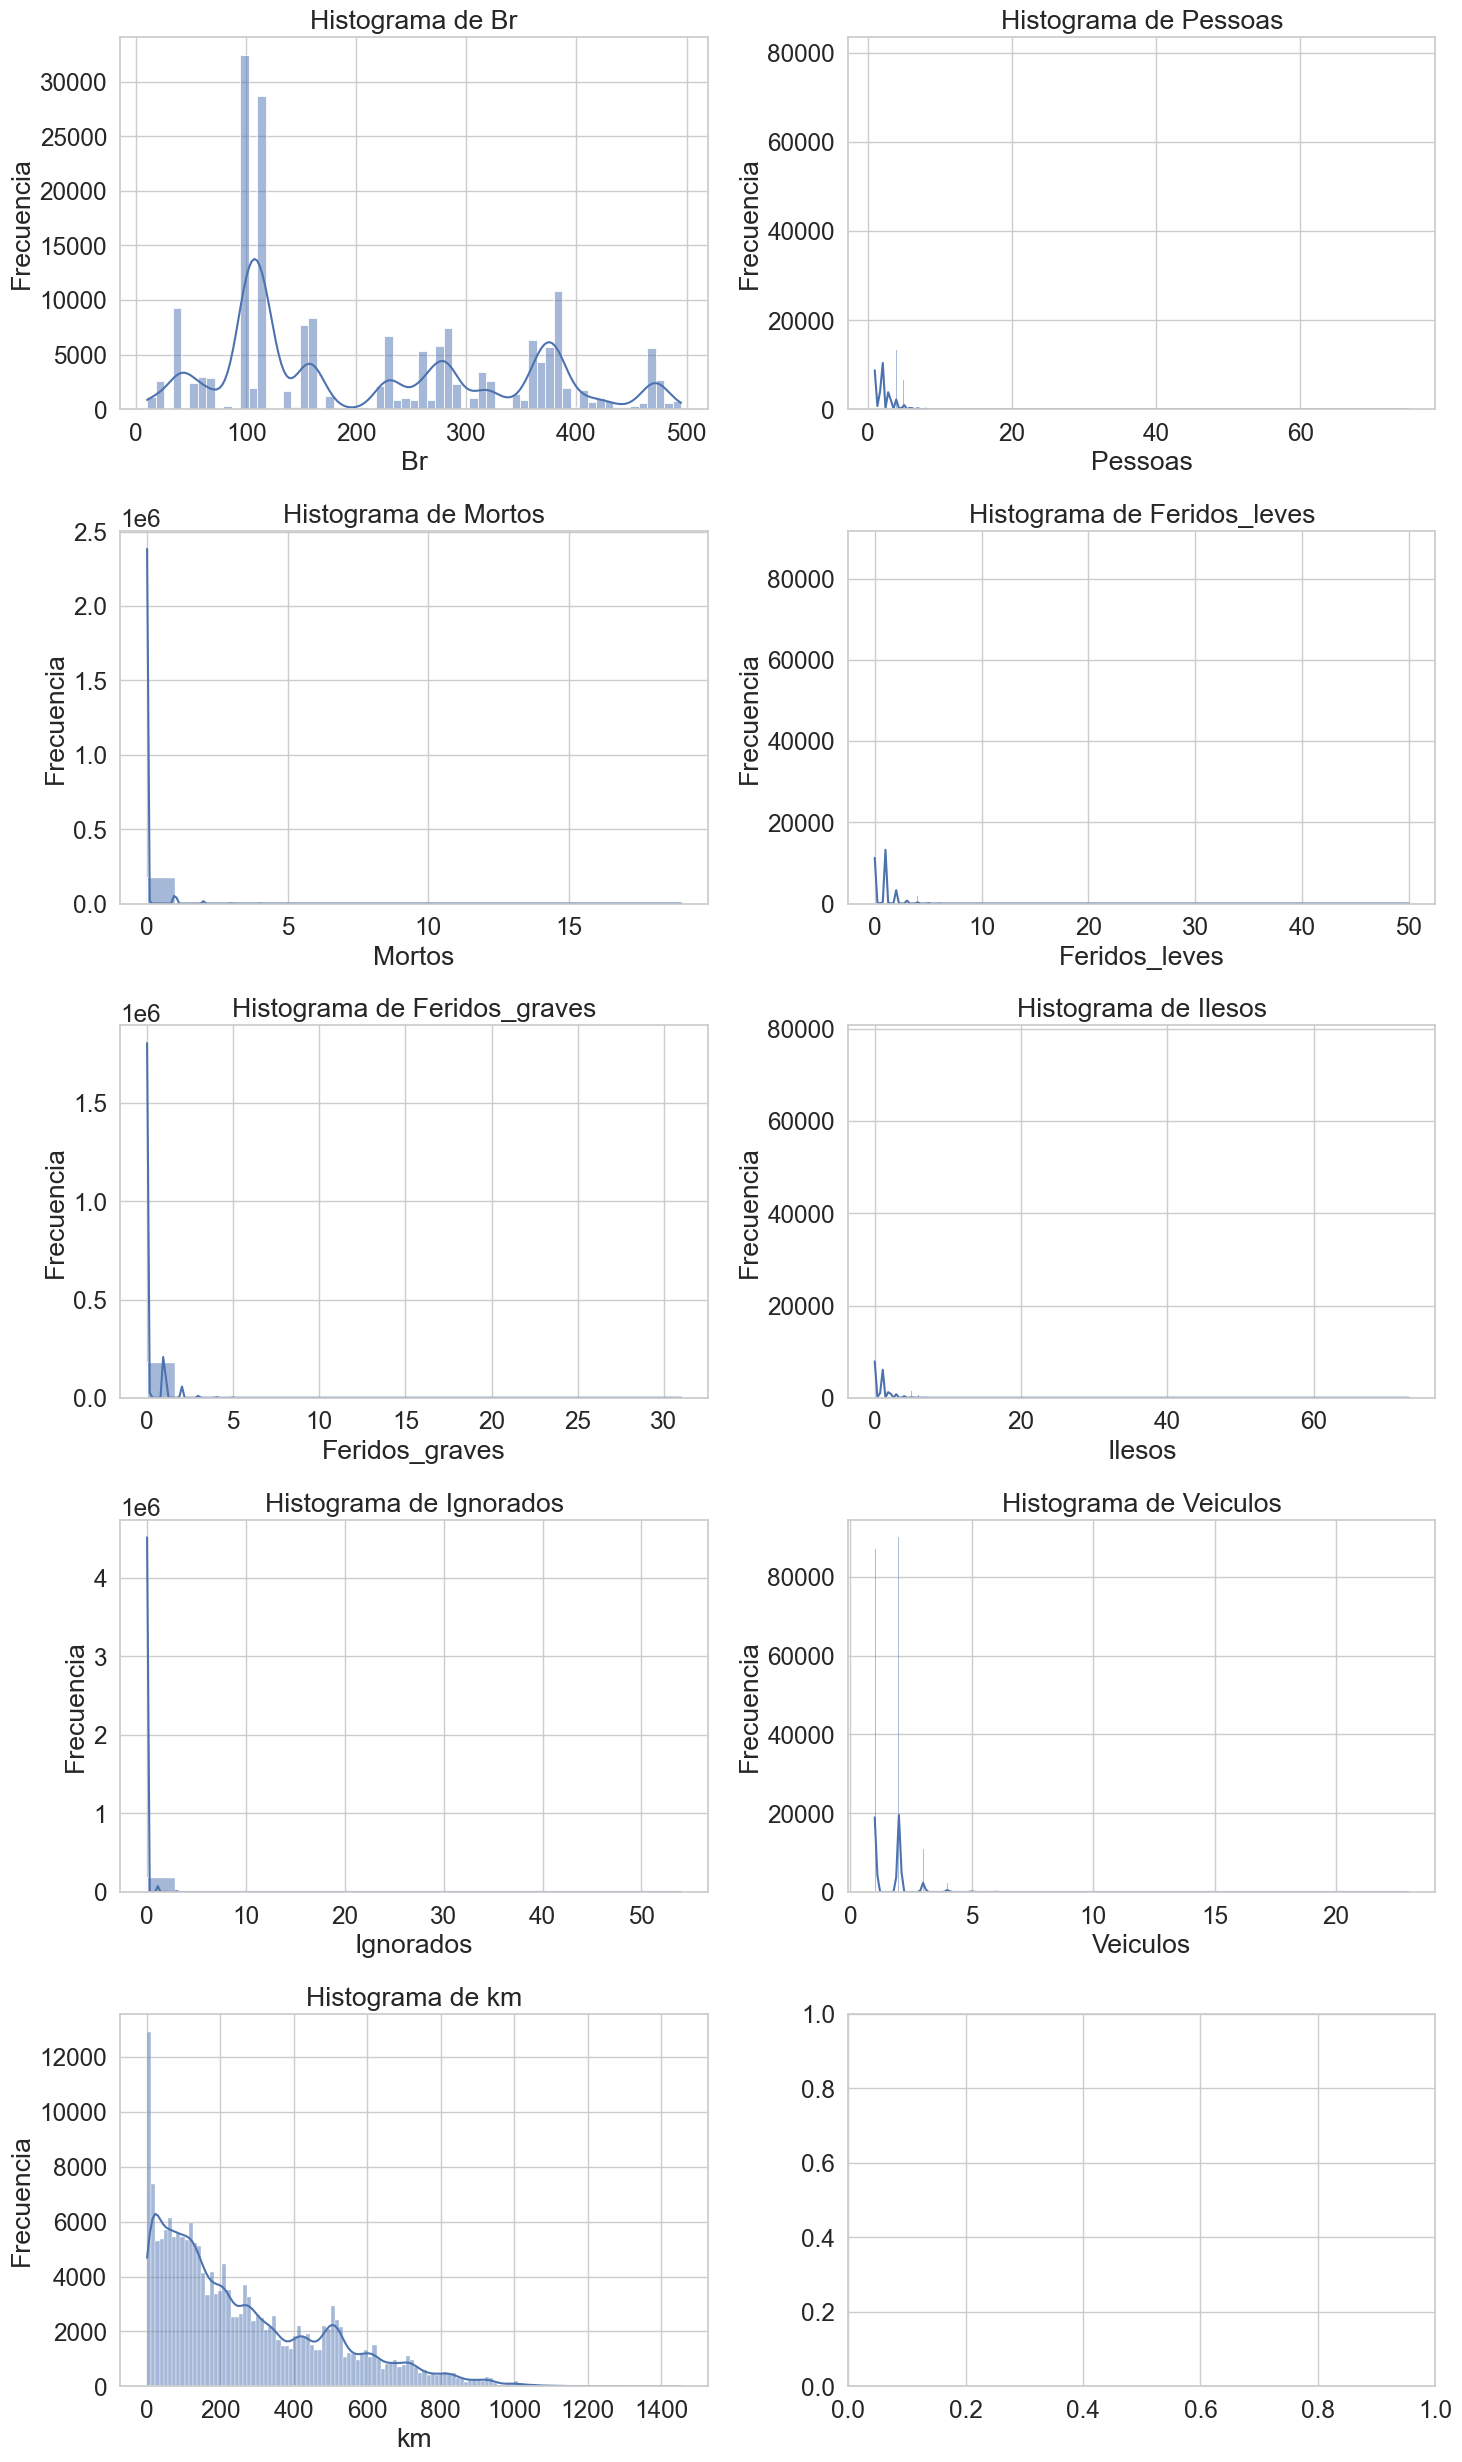

In [280]:

def correlacoes_histogramas(df):
    # Excluir la columna "Id_acidente" si existe
    if 'Id_acidente' in df.columns:
        df_numeric = df.drop(columns=['Id_acidente']).select_dtypes(include=['number'])
    else:
        df_numeric = df.select_dtypes(include=['number'])
    
    # Calcular correlaciones
    corr = df_numeric.corr()
    
    # Crear una máscara triangular superior para ocultar la mitad inferior de la matriz
    mascara = np.triu(np.ones_like(corr, dtype=bool))
    
    # Ajustar la escala de la fuente y el estilo
    sns.set(font_scale=1.6)
    sns.set_style('whitegrid')
    
    # Crear el mapa de calor
    plt.figure(figsize=(15, 13))
    mapa_calor = sns.heatmap(corr, mask=mascara, annot=True, vmin=-1, vmax=1, cmap='coolwarm', linewidths=1)
    
    plt.title('Mapa de calor de correlación')
    plt.show()
    
    # Ajustar el número de columnas y filas para los histogramas
    num_cols = df_numeric.shape[1]
    num_rows = int(np.ceil(num_cols / 2))
    
    # Crear subplots para histogramas
    fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))
    axes = axes.flatten() # Aplanar el array de subplots en caso necesario
    
    # Iterar sobre las columnas numéricas y trazar histogramas
    for i, col in enumerate(df_numeric.columns):
        sns.histplot(df[col], ax=axes[i], kde=True)
        axes[i].set_title(f'Histograma de {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frecuencia')
    
    # Ajustar el espaciado entre subplots
    plt.tight_layout()
    plt.show()

# Llamar a la función con tu DataFrame
correlacoes_histogramas(df)

## Mapa de Calor de Correlación:
El mapa de calor representa la correlación entre diferentes variables numéricas en el conjunto de datos. Los colores varían desde el rojo hasta el azul, indicando una correlación positiva fuerte a una correlación negativa fuerte, respectivamente. Algunas observaciones claves son:

Hay una correlación positiva notable (0.74) entre 'Illesos' y 'Pessoas', lo que podría indicar que a medida que aumenta el número de personas involucradas en un accidente, también aumenta el número de personas que salen ilesas.
'Veiculos' muestra una correlación positiva moderada con 'Pessoas' y 'Illesos' (0.44), sugiriendo que los accidentes con más vehículos involucrados tienden a tener más personas y posiblemente más personas ilesas.
Otras variables como 'Mortos' (muertos) y 'Feridos_leves' (heridos leves) tienen una correlación positiva entre sí (0.48), lo que podría reflejar que los accidentes más graves resultan tanto en muertes como en lesiones leves.
Estas correlaciones pueden proporcionar información sobre las características de los accidentes de tráfico y podrían ser útiles para entender la dinámica de los accidentes y para planificar medidas de seguridad.

## Histogramas de Variables:
Los histogramas muestran la distribución de frecuencias de cada variable numérica en el conjunto de datos. Por ejemplo, vemos que:

'Br' y 'km' tienen distribuciones con picos pronunciados, lo que puede indicar que ciertas carreteras o kilómetros específicos son sitios comunes para accidentes.
'Mortos', 'Feridos_graves' (heridos graves), y 'Ignorados' tienen distribuciones muy sesgadas hacia el valor más bajo, lo que sugiere que la mayoría de los accidentes no resultan en muertes ni lesiones graves, y que hay relativamente poca falta de información.
'Veiculos' muestra que la mayoría de los accidentes involucran una cantidad baja de vehículos.
La interpretación de estos histogramas es crucial para identificar tendencias y patrones en los datos. Por ejemplo, la frecuencia alta en los valores bajos para 'Mortos' es algo positivo, indicando que la mayoría de los accidentes no son fatales. Sin embargo, la concentración de accidentes en ciertos 'Br' o 'km' podría requerir una investigación más profunda para determinar las causas y mitigar los riesgos.

Al realizar el análisis de correlación y los histogramas, me he vuelto más consciente de la complejidad de los datos de accidentes de tráfico y de la importancia de entender bien las relaciones entre diferentes variables para hacer predicciones precisas y formular políticas efectivas de prevención de accidentes.